<h3>Milestone 1: Requirements & Data Preparation </h3>

<p><strong>Brief about Dataset</strong><br>
This dataset contains dynamic pricing data from a ride-share platform. It captures various factors influencing ride cost and customer behavior.</p>

<p><strong>Key Features:</strong></p>

<ul>
  <li><strong>Number_of_Riders</strong>, <strong>Number_of_Drivers</strong>: Reflect supply and demand dynamics</li>
  <li><strong>Location_Category</strong>: Categorical — Urban, Suburban, Rural</li>
  <li><strong>Customer_Loyalty_Status</strong>: Ordinal — Gold, Silver, Regular</li>
  <li><strong>Number_of_Past_Rides</strong>: Indicates historical customer engagement</li>
  <li><strong>Average_Ratings</strong>: Driver/rider ratings (scale: 0–5)</li>
  <li><strong>Time_of_Booking</strong>: Categorical — Morning, Afternoon, Evening, Night</li>
  <li><strong>Vehicle_Type</strong>: Categorical — Economy, Premium</li>
  <li><strong>Expected_Ride_Duration</strong>: Duration in minutes</li>
  <li><strong>Historical_Cost_of_Ride</strong>: Target variable — continuous numeric price</li>
</ul>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


loading the dataset dynamic_pricing.csv using Pandas.
The df.head() command displays the first 5 rows to verify successful loading.

In [3]:
df = pd.read_csv('dynamic_pricing.csv')
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


<h3>Milestone 3: Exploratory Data Analysis</h3>

The df.info() function provides a quick summary of the dataset.
It shows the column names, data types, and non-null values, helping identify missing or inconsistent data early.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


Data Quality Check — finding Missing & Duplicate Values 

In [4]:
print("--- Missing Values Per Column ---")
print(df.isnull().sum())
print("--- Number of Duplicate Rows ---")
print(f"Found {df.duplicated().sum()} duplicate rows.")

--- Missing Values Per Column ---
Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64
--- Number of Duplicate Rows ---
Found 0 duplicate rows.


statistics for all numeric columns, including count, mean, standard deviation,  minimum, maximum, and quartile values. 
It helps understand data distribution, detect outliers,and identify potential skewness or irregularities that influence model performance.

In [11]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


Ride Cost Distribution Visualization  

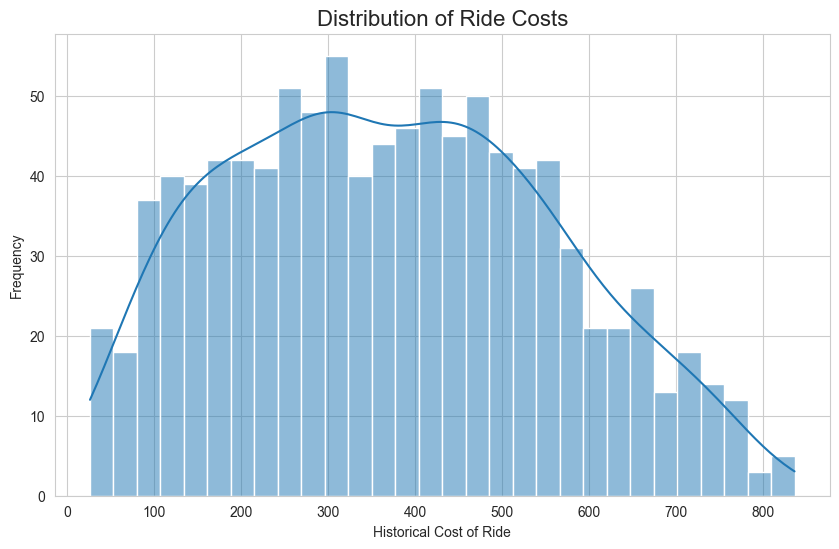

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Historical_Cost_of_Ride'], kde=True, bins=30)
plt.title('Distribution of Ride Costs', fontsize=16)
plt.xlabel('Historical Cost of Ride')
plt.ylabel('Frequency')
plt.show()

Outlier Detection Using IQR Method  
Calculates typical data range (Q1–1.5*IQR to Q3+1.5*IQR) and lists values falling outside it.  

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"Column: {col}")
    print(f"Typical Range: {lower_bound:.2f} to {upper_bound:.2f}")
    print(f"Outliers Found: {len(outliers)} ({(len(outliers)/len(df))*100:.2f}%)")
    
    if not outliers.empty:
        print(f"   Outlier Values: {outliers[col].values[:10]}{'...' if len(outliers) > 10 else ''}")
    else:
        print("   No outliers detected.")

   Column: Number_of_Riders
   Typical Range: -21.50 to 142.50
   Outliers Found: 0 (0.00%)
   No outliers detected.
   Column: Number_of_Drivers
   Typical Range: -29.50 to 78.50
   Outliers Found: 10 (1.00%)
   Outlier Values: [81 84 80 80 87 81 89 85 87 82]
   Column: Number_of_Past_Rides
   Typical Range: -50.00 to 150.00
   Outliers Found: 0 (0.00%)
   No outliers detected.
   Column: Average_Ratings
   Typical Range: 2.73 to 5.78
   Outliers Found: 0 (0.00%)
   No outliers detected.
   Column: Expected_Ride_Duration
   Typical Range: -65.12 to 267.88
   Outliers Found: 0 (0.00%)
   No outliers detected.
   Column: Historical_Cost_of_Ride
   Typical Range: -212.33 to 944.20
   Outliers Found: 0 (0.00%)
   No outliers detected.


Understanding Boxplots & Outliers  
The box shows data spread (Q1–Q3) and median; whiskers show normal range.  
Points outside whiskers are outliers — extreme values that may affect model accuracy.

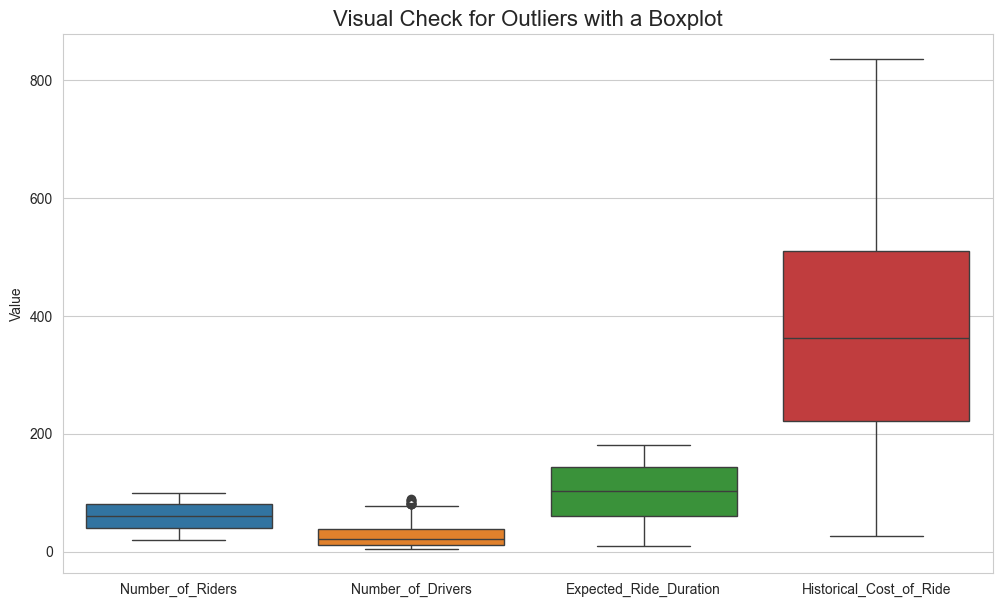

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['Number_of_Riders', 'Number_of_Drivers', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
plt.figure(figsize=(12, 7))
sns.boxplot(data=df[numerical_cols])
plt.title('Visual Check for Outliers with a Boxplot', fontsize=16)
plt.ylabel('Value')
plt.show()

Correlation Heatmap  
Displays relationships between numeric variables using correlation coefficients.  

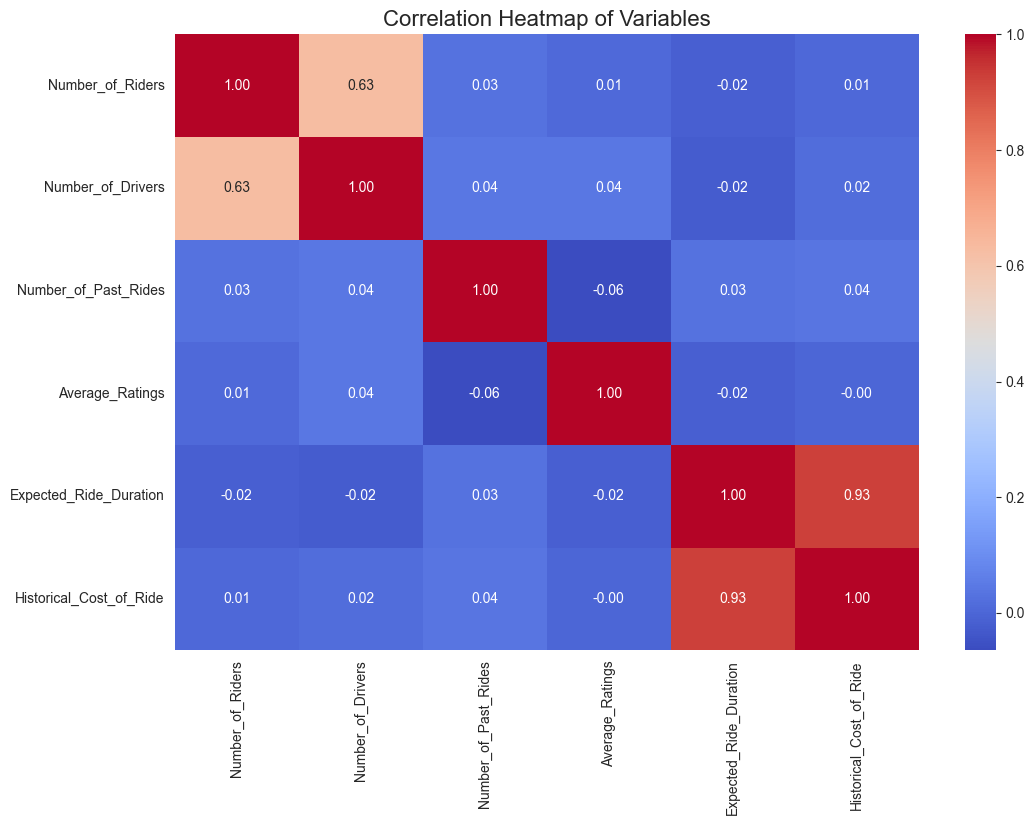

In [15]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables', fontsize=16)
plt.show()

 It generates a regression plot to visually inspect the linear relationship between the expected duration of a ride and its historical cost. This step is crucial for understanding data patterns and preparing the detailed EDA report with visualizations, which is a key deliverable for this phase.

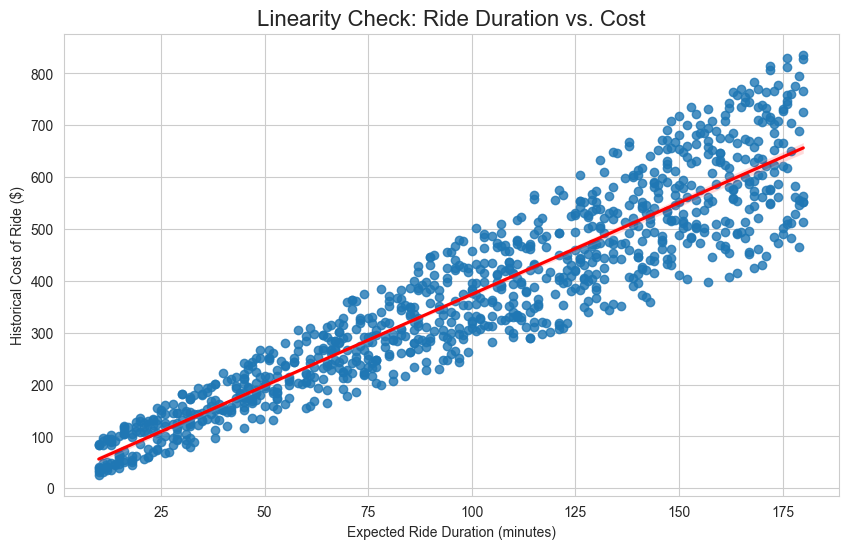

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.regplot(x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', data=df, line_kws={"color": "red"})
plt.title('Linearity Check: Ride Duration vs. Cost', fontsize=16)
plt.xlabel('Expected Ride Duration (minutes)')
plt.ylabel('Historical Cost of Ride ($)')
plt.show()

It converts categorical text data into a numerical format using one-hot encoding, which is a necessary preprocessing step before model training. This prepares the dataset for the ML models like XGBoost and LightGBM, which require all input features to be numeric

In [17]:
print("--- Data Before Encoding ---")
print(df.head())
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\n" + "="*50 + "\n")
print("--- Data After One-Hot Encoding ---")
print(df_encoded.head())
print("\n--- New Columns Created ---")
print(df_encoded.columns)

--- Data Before Encoding ---
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Prem

It generates a table of descriptive statistics (count, mean, standard deviation, quartiles, etc.) for the dataset's numerical columns. 

In [18]:
summary_stats = df.describe()
print("--- Summary Statistics ---")
print(summary_stats)

--- Summary Statistics ---
       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25

visually confirming a strong positive relationship between ride duration and cost. The most critical insight is the increasing price variance for longer trips, which suggests other features influence the final price more heavily on longer rides. 

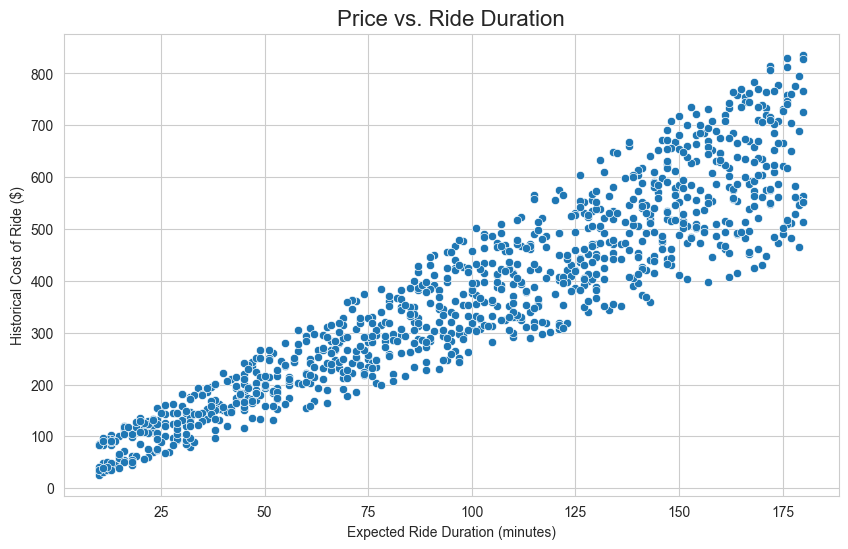

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', data=df)
plt.title('Price vs. Ride Duration', fontsize=16)
plt.xlabel('Expected Ride Duration (minutes)')
plt.ylabel('Historical Cost of Ride ($)')
plt.show()

generates a box plot to compare the ride cost distributions for different vehicle types. The output clearly shows that "Premium" rides have a higher median cost and a generally higher price range compared to "Economy" rides. 

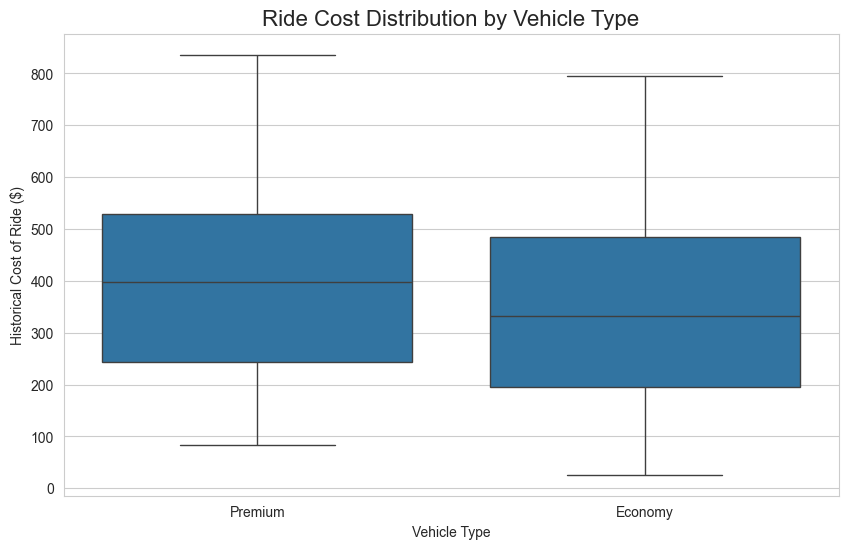

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_Type', y='Historical_Cost_of_Ride', data=df)
plt.title('Ride Cost Distribution by Vehicle Type', fontsize=16)
plt.xlabel('Vehicle Type')
plt.ylabel('Historical Cost of Ride ($)')
plt.show()

 creates a bar plot to compare the average ride cost across different location categories. The key insight from the output is that there is no significant difference in the average cost between Urban, Suburban, and Rural locations.

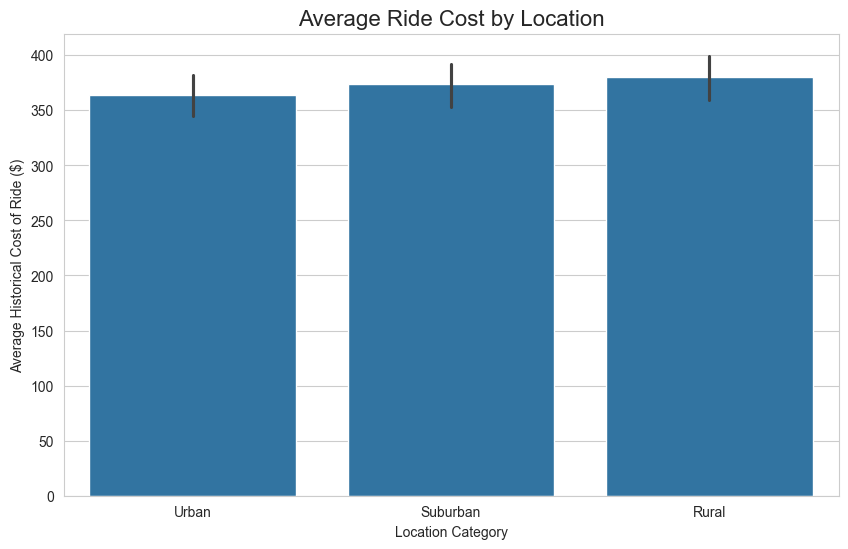

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Location_Category', y='Historical_Cost_of_Ride', data=df)
plt.title('Average Ride Cost by Location', fontsize=16)
plt.xlabel('Location Category')
plt.ylabel('Average Historical Cost of Ride ($)')
plt.show()

creates a bar plot to compare the average ride cost across different location categories. The key insight from the output is that there is no significant difference in the average cost between Urban, Suburban, and Rural locations.

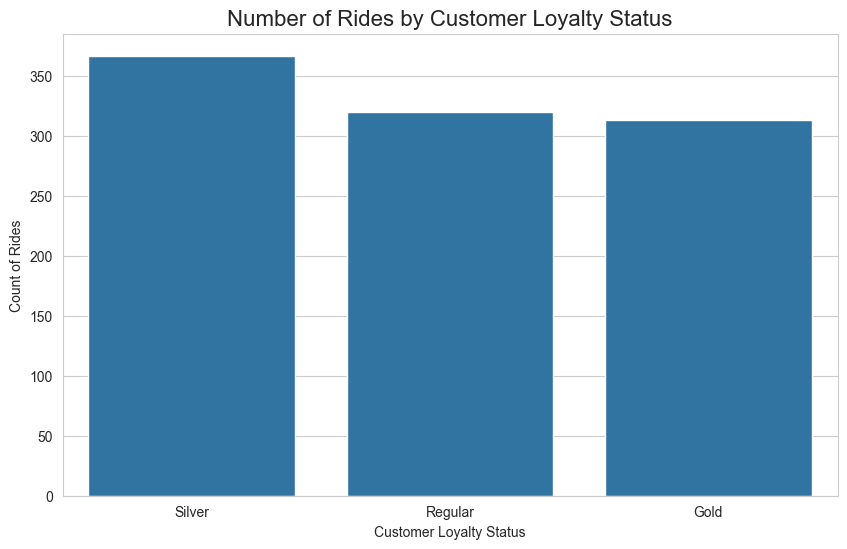

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Loyalty_Status', data=df, order = df['Customer_Loyalty_Status'].value_counts().index)
plt.title('Number of Rides by Customer Loyalty Status', fontsize=16)
plt.xlabel('Customer Loyalty Status')
plt.ylabel('Count of Rides')
plt.show()

It removes potential outliers from the Historical_Cost_of_Ride column by using the Interquartile Range (IQR) method to filter out extreme values. This cleaning process is a key part of preparing the dataset, ensuring that the ML models trained later are more robust and accurate.

In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv('dynamic_pricing.csv')
print(f"Shape of original DataFrame: {df.shape}")
Q1 = df['Historical_Cost_of_Ride'].quantile(0.25)
Q3 = df['Historical_Cost_of_Ride'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['Historical_Cost_of_Ride'] >= lower_bound) & (df['Historical_Cost_of_Ride'] <= upper_bound)]

print(f"Shape after removing outliers: {df_cleaned.shape}")
final_df = df_cleaned

print(f"Shape of final cleaned DataFrame: {final_df.shape}")
print("\n--- First 5 rows of the cleaned data ---")
print(final_df.head())

Shape of original DataFrame: (1000, 10)
Shape after removing outliers: (1000, 10)
Shape of final cleaned DataFrame: (1000, 10)

--- First 5 rows of the cleaned data ---
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0  

It groups the data by both location and vehicle type to calculate the average ride cost for each specific segment (e.g., 'Urban-Premium' vs. 'Suburban-Economy').

In [25]:
segment_analysis = df_cleaned.groupby(['Location_Category', 'Vehicle_Type'])['Historical_Cost_of_Ride'].mean()
print("\n--- Average Ride Cost by Segment ---")
print(segment_analysis)


--- Average Ride Cost by Segment ---
Location_Category  Vehicle_Type
Rural              Economy         341.309149
                   Premium         412.963695
Suburban           Economy         369.177242
                   Premium         379.273598
Urban              Economy         330.010664
                   Premium         395.079144
Name: Historical_Cost_of_Ride, dtype: float64


It shows a flat trend line, which is a critical insight. It reveals that the historical price was not correlated with the number of riders, a key finding for understanding demand elasticity.

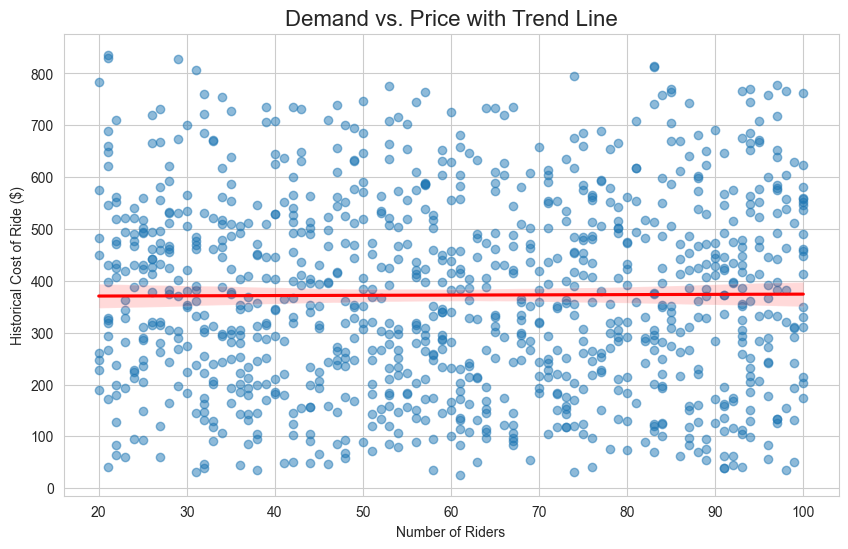

In [26]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Number_of_Riders', y='Historical_Cost_of_Ride', data=df_cleaned, 
            scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Demand vs. Price with Trend Line', fontsize=16)
plt.xlabel('Number of Riders')
plt.ylabel('Historical Cost of Ride ($)')
plt.show()

It shows that the entire price distribution—including median, quartiles, and range—is nearly identical across all location categories. This provides strong evidence that location has not been a significant factor in the historical pricing model.

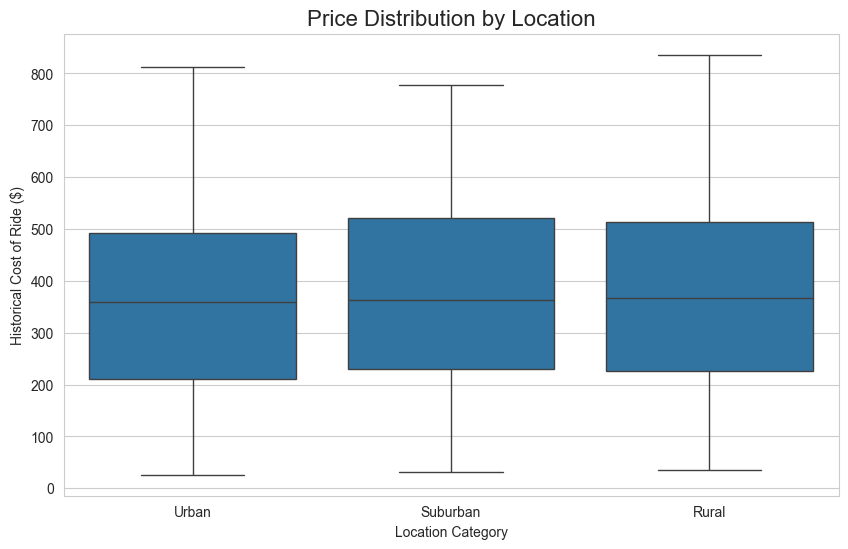

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location_Category', y='Historical_Cost_of_Ride', data=df_cleaned)
plt.title('Price Distribution by Location', fontsize=16)
plt.xlabel('Location Category')
plt.ylabel('Historical Cost of Ride ($)')
plt.show()

It saves the fully cleaned and engineered dataset to a new file named cleaned_data.csv. 
This concludes the data preparation and feature engineering phases, creating the final dataset ready for model training in Milestone 5

In [28]:
final_df = df_encoded
final_df.to_csv('cleaned_data.csv', index=False)

print("\nCleaned data has been successfully saved to 'cleaned_data.csv'")


Cleaned data has been successfully saved to 'cleaned_data.csv'


Check Loyalty Status

In [38]:
df = pd.read_csv('data/cleaned/cleaned_data.csv')
print("Loyalty Status Distribution:")
print(df['Customer_Loyalty_Status'].value_counts())

Loyalty Status Distribution:
Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64


Basic GroupBy - Average Price


In [39]:
avg_price = df.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].mean()

print("\nAverage Price by Loyalty Status:")
print(avg_price.round(2))


Average Price by Loyalty Status:
Customer_Loyalty_Status
Gold       376.12
Regular    380.13
Silver     362.77
Name: Historical_Cost_of_Ride, dtype: float64


Multiple Statistics at Once

In [40]:
price_stats = df.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].agg([
    'mean',
    'min', 
    'max',
    'count'
]).round(2)

print("\nPrice Statistics by Loyalty:")
print(price_stats)


Price Statistics by Loyalty:
                           mean    min     max  count
Customer_Loyalty_Status                              
Gold                     376.12  31.57  828.21    313
Regular                  380.13  34.57  836.12    320
Silver                   362.77  25.99  814.42    367


Creating Summary Table

In [41]:
summary = df.groupby('Customer_Loyalty_Status').agg({
    'Historical_Cost_of_Ride': ['mean', 'count'],
    'Average_Ratings': 'mean',
    'Expected_Ride_Duration': 'mean'
}).round(2)

summary.columns = ['Avg_Price', 'Total_Rides', 'Avg_Rating', 'Avg_Duration']
print("\nSummary Table:")
print(summary)


Summary Table:
                         Avg_Price  Total_Rides  Avg_Rating  Avg_Duration
Customer_Loyalty_Status                                                  
Gold                        376.12          313        4.22        101.60
Regular                     380.13          320        4.26        100.57
Silver                      362.77          367        4.29         97.02


Creating Pivot Table

In [42]:
pivot = df.pivot_table(
    values='Historical_Cost_of_Ride',
    index='Customer_Loyalty_Status',
    columns='Vehicle_Type',
    aggfunc='mean'
).round(2)

print("\nPivot Table (Loyalty x Vehicle):")
print(pivot)


Pivot Table (Loyalty x Vehicle):
Vehicle_Type             Economy  Premium
Customer_Loyalty_Status                  
Gold                      349.78   401.30
Regular                   377.15   382.56
Silver                    319.53   404.85


Bar Chart

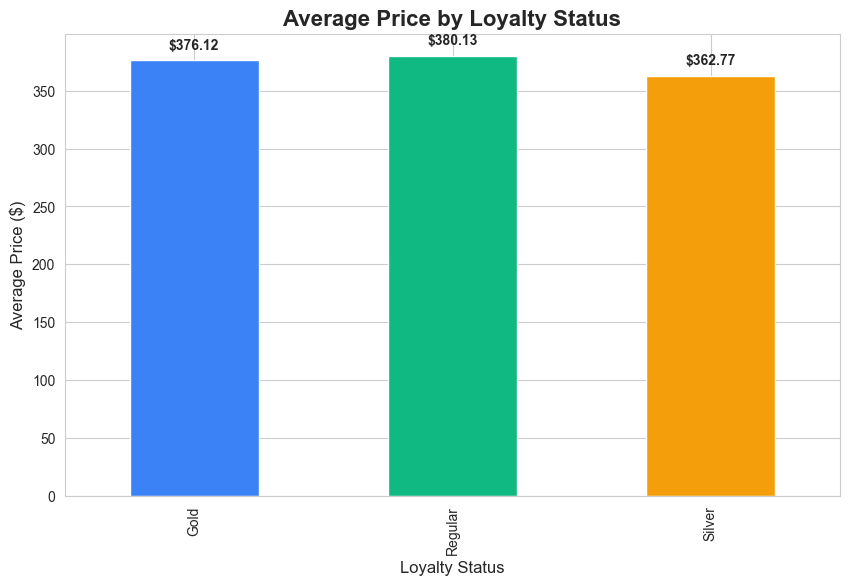

In [43]:
plt.figure(figsize=(10, 6))
avg_price.plot(kind='bar', color=['#3B82F6', '#10B981', '#F59E0B', '#EF4444'])
plt.title('Average Price by Loyalty Status', fontsize=16, fontweight='bold')
plt.xlabel('Loyalty Status', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
for i, v in enumerate(avg_price.values):
    plt.text(i, v + 10, f'${v:.2f}', ha='center', fontweight='bold')
plt.show()

Key Insights

In [44]:
# 1. Highest paying tier
highest_tier = avg_price.idxmax()
highest_price = avg_price.max()
print(f"\n1. Highest Paying Tier: {highest_tier} (${highest_price:.2f})")

# 2. Lowest paying tier
lowest_tier = avg_price.idxmin()
lowest_price = avg_price.min()
print(f"2. Lowest Paying Tier: {lowest_tier} (${lowest_price:.2f})")

# 3. Price gap
price_gap = highest_price - lowest_price
pct_gap = (price_gap / lowest_price) * 100
print(f"3. Price Gap: ${price_gap:.2f} ({pct_gap:.1f}%)")

# 4. Most common tier
most_common = df['Customer_Loyalty_Status'].value_counts().idxmax()
most_common_count = df['Customer_Loyalty_Status'].value_counts().max()
print(f"4. Most Common Tier: {most_common} ({most_common_count} rides)")

# 5. Total revenue by tier
revenue_by_tier = df.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].sum()
top_revenue = revenue_by_tier.idxmax()
print(f"5. Highest Revenue Tier: {top_revenue} (${revenue_by_tier[top_revenue]:,.2f})")




1. Highest Paying Tier: Regular ($380.13)
2. Lowest Paying Tier: Silver ($362.77)
3. Price Gap: $17.35 (4.8%)
4. Most Common Tier: Silver (367 rides)
5. Highest Revenue Tier: Silver ($133,137.38)


calculates the percentage distribution of bookings for each time of day

In [45]:
time_pct = (df['Time_of_Booking'].value_counts() / len(df) * 100).round(1)
print(time_pct)


Time_of_Booking
Night        27.6
Afternoon    24.7
Morning      24.6
Evening      23.1
Name: count, dtype: float64


Price Distribution by Time


Histograms saved as 'time_histograms.png'


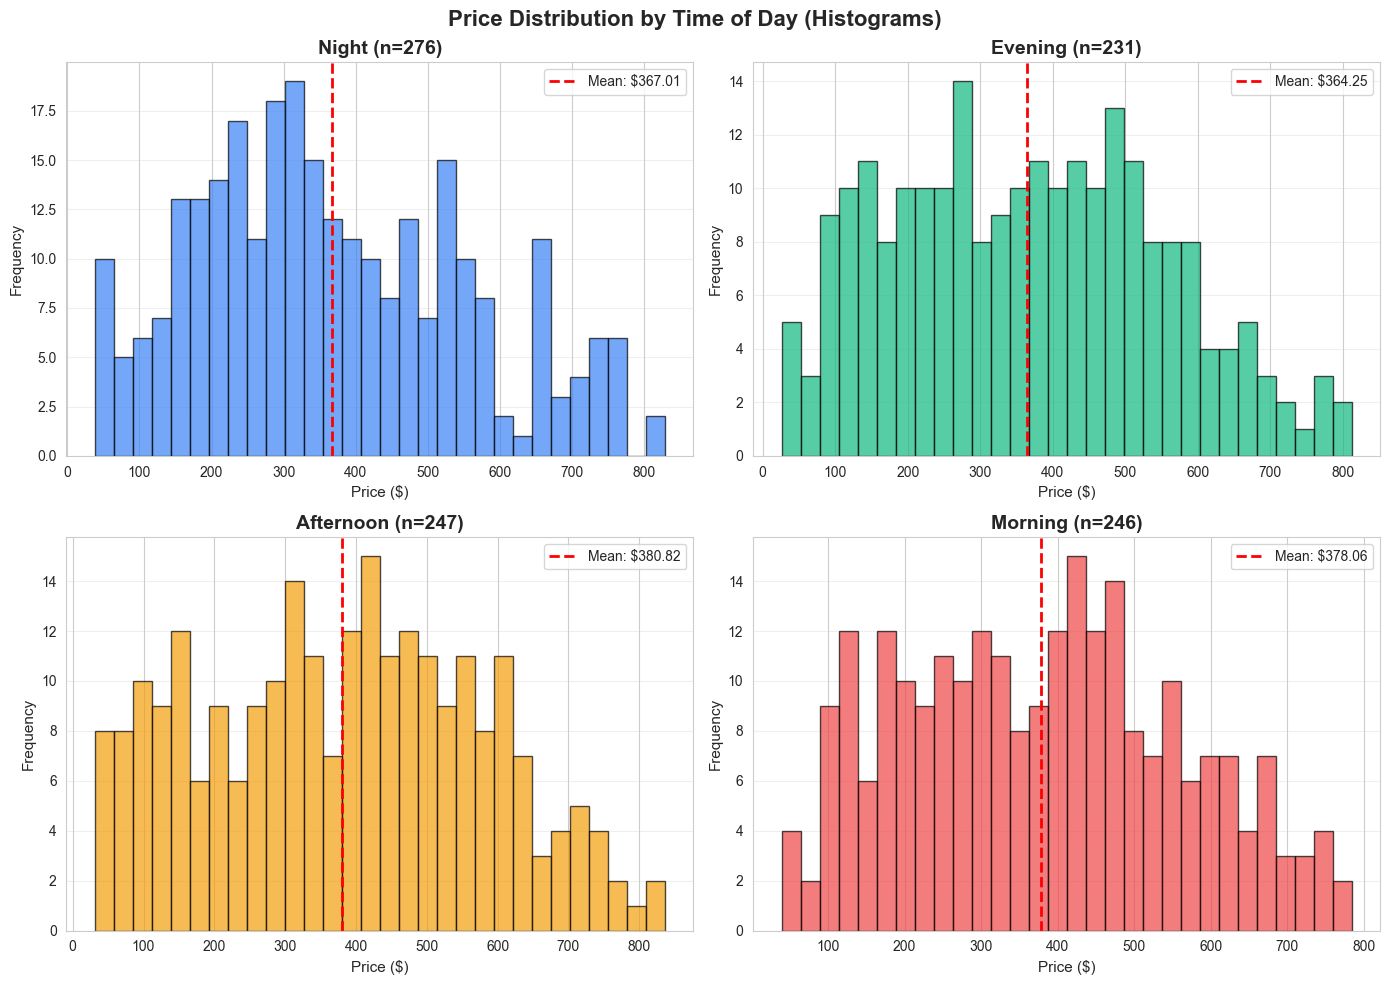

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Price Distribution by Time of Day (Histograms)', fontsize=16, fontweight='bold')

times = df['Time_of_Booking'].unique()
colors = ['#3B82F6', '#10B981', '#F59E0B', '#EF4444']

for idx, time in enumerate(times):
    if idx < 4: 
        row = idx // 2
        col = idx % 2
        ax = axes[row, col]
        time_data = df[df['Time_of_Booking'] == time]['Historical_Cost_of_Ride']
        ax.hist(time_data, bins=30, color=colors[idx], alpha=0.7, edgecolor='black')
        ax.set_title(f'{time} (n={len(time_data)})', fontsize=14, fontweight='bold')
        ax.set_xlabel('Price ($)', fontsize=11)
        ax.set_ylabel('Frequency', fontsize=11)
        ax.axvline(time_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${time_data.mean():.2f}')
        ax.legend()
        ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('time_histograms.png', dpi=300, bbox_inches='tight')
print("\Histograms saved as 'time_histograms.png'")
plt.show()


Overlapped Distribution

Overlapped histogram saved as 'time_overlapped_histogram.png'


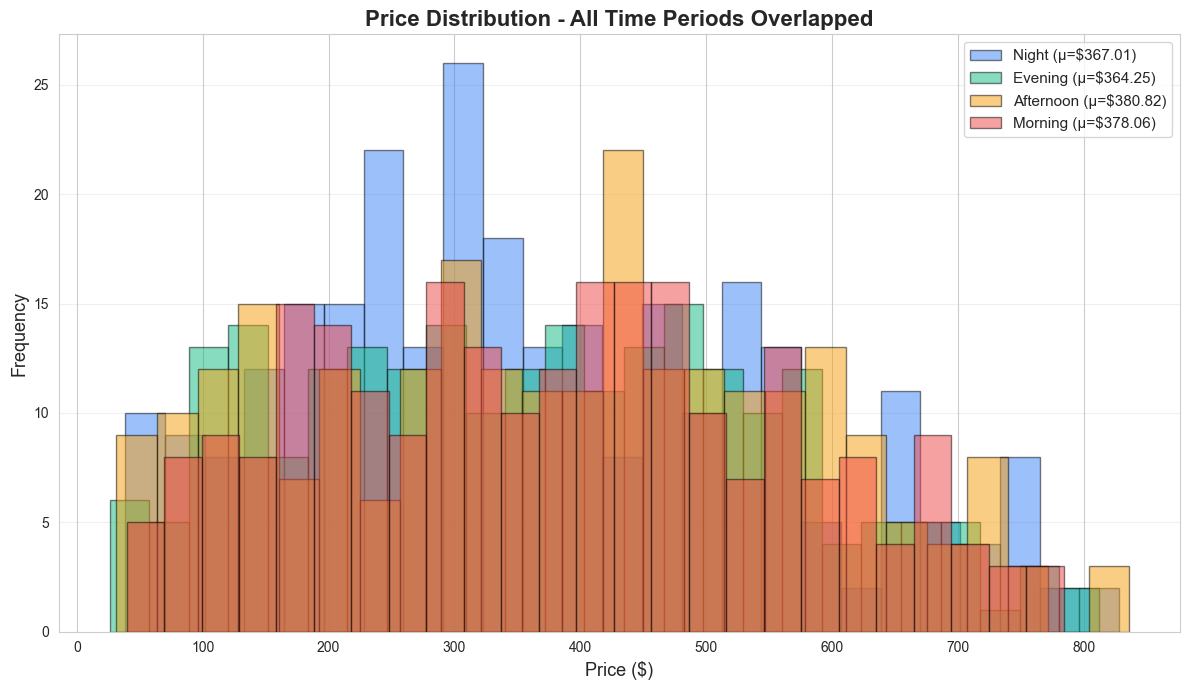

In [47]:
plt.figure(figsize=(12, 7))

for idx, time in enumerate(times):
    time_data = df[df['Time_of_Booking'] == time]['Historical_Cost_of_Ride']
    plt.hist(time_data, bins=25, alpha=0.5, label=f'{time} (μ=${time_data.mean():.2f})', 
             color=colors[idx], edgecolor='black')

plt.title('Price Distribution - All Time Periods Overlapped', fontsize=16, fontweight='bold')
plt.xlabel('Price ($)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('time_overlapped_histogram.png', dpi=300, bbox_inches='tight')
print("Overlapped histogram saved as 'time_overlapped_histogram.png'")
plt.show()
